In [6]:
from google.colab import drive
import matplotlib.pyplot as plt
import os
import sys
from IPython.display import HTML, display
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Concatenate, Add, Dot, Multiply, Reshape, Activation, BatchNormalization, SimpleRNNCell, RNN, SimpleRNN, LSTM, Embedding, Bidirectional, TimeDistributed, Conv1D, Conv2D, MaxPool1D, MaxPool2D, GlobalMaxPool1D, GlobalMaxPool2D, AveragePooling1D, AveragePooling2D, GlobalAveragePooling1D, GlobalAveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Input, Model, Sequential

drive.mount("/content/drive", force_remount=True)
try:
    my_path = "/content/notebooks"
    os.symlink("/content/drive/MyDrive/ColabNotebooks/my_env", my_path)
    sys.path.insert(0, my_path)
except:
    pass
os.chdir(my_path)

def set_css():
  display(HTML("""
  <style>
    pre {white-space: pre-wrap;}
  </style>
  """))
get_ipython().events.register("pre_run_cell", set_css)

plt.style.use("dark_background")

Mounted at /content/drive


In [3]:
(X_tr, y_tr), (X_te, y_te) = tf.keras.datasets.fashion_mnist.load_data()

X_tr = X_tr[:, :, :, None]
X_te = X_te[:, :, :, None]
n_clss = 10
y_tr = tf.keras.utils.to_categorical(y_tr, n_clss)
y_te = tf.keras.utils.to_categorical(y_te, n_clss)
X_tr = X_tr.astype("float32")
X_te = X_te.astype("float32")
X_tr /= 255
X_te /= 255

In [4]:
input_shape = X_tr[0].shape

In [16]:
model = Sequential()
model.add(Conv2D(input_shape=input_shape, filters=6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="same"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
model.add(Conv2D(filters=120, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))
model.add(Flatten())
model.add(Dense(units=120, activation="tanh"))
model.add(Dense(units=84, activation="tanh"))
model.add(Dense(units=n_clss, activation="softmax"))

model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

model.summary()
# Place the logs in a timestamped subdirectory
# In order not to overwrite some data, it is useful to have a name with a timestamp
# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Specify the callback object
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# tf.keras.callback.TensorBoard ensures that logs are created and stored
# We need to pass callback object to the fit method
# The way to do this is by passing the list of callback objects, which is in our case just one

# history = model.fit(X_tr, y=y_tr, 
#           epochs=5, 
#           batch_size = 32,
#           validation_data=(X_te, y_te), 
        #   callbacks=[tensorboard_callback],
        #   verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_7 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)              

1.   156 = (5 * 5 * 6) + 6 
2.   2416 = (6 * 5 * 5 * 16) + 16 
3.   48120 = (16 * 5 * 5 * 120) + 120
4.   14520 = (120 * 120) + 120
5.   10164 = (120 * 84) + 84
6.   850 = (84 * 10) + 10

1875 = 60000/32

https://keras.io/api/callbacks/

In [ ]:
# Place the logs in a timestamped subdirectory
# In order not to overwrite some data, it is useful to have a name with a timestamp
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Specify the callback object
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# tf.keras.callback.TensorBoard ensures that logs are created and stored
# We need to pass callback object to the fit method
# The way to do this is by passing the list of callback objects, which is in our case just one

history = model.fit(X_tr, y=y_tr, 
          epochs=5, 
          batch_size = 32,
          validation_data=(X_te, y_te), 
          callbacks=[tensorboard_callback],
          verbose=1)

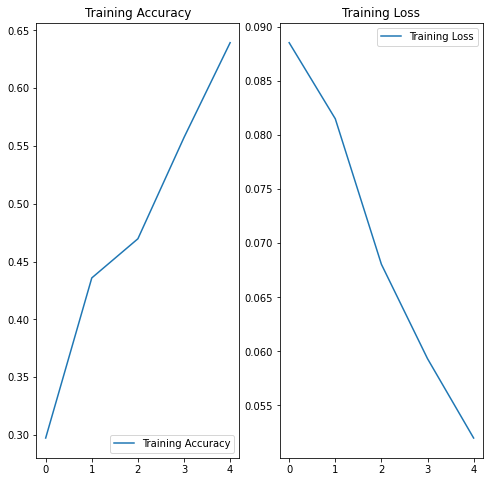

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
test_score = model.evaluate(X_te,y_te)


313/313 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.6594


In [ ]:
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

Test loss 0.0492, accuracy 65.94%


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit